# Bike Sharing Demand
- https://www.kaggle.com/competitions/bike-sharing-demand/data

## 나눔폰트 설치

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

- 테스트

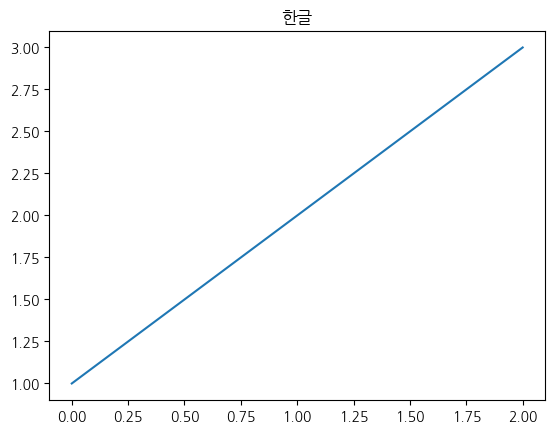

In [2]:
import matplotlib.pyplot as plt
plt.rc("font", family="NanumGothic") # 라이브러리 불러오기와 함께 한번만 실행

plt.plot([1, 2, 3])
plt.title("한글")
plt.show()

## 데이터 불러오기

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
DATA_PATH = '/content/drive/MyDrive/Colab Notebooks/ml/data/bike-sharing-demand/'
train = pd.read_csv(DATA_PATH + 'train.csv')
test = pd.read_csv(DATA_PATH + 'test.csv')
submission = pd.read_csv(DATA_PATH + 'sampleSubmission.csv')

In [6]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [7]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [8]:
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## 탐색적 자료 분석
- 독립변수
  - datetime : 1시간 간격 데이터 수집
  - season
    + 1 : 봄, 2 : 여름, 3 : 가을, 4 : 겨울
  - workingday
    + 0 : 평일이 아님, 1 : 평일
  - weather
    +1 : 맑은, 2 : 약간 흐림, 3: 약한 눈, 비, 4: 폭우, 폭설(기상이 매우 안 좋은 상태)

- 종속변수 : count(자전거 대여 수량)

## 문제 정의
- 각 시간대 별로 자전거 대여 수량을 예측하세요.

## 데이터 확인
- casual, registered 가 훈련데이터에 존재, 테스트 데이터에는 현재 없는 상황
  + casual : 비회원수
  + registered : 회원수

## 날짜 데이터 변환

In [9]:
# pd.to_datetime(train['datetime'])
train['date'] = train['datetime'].apply(lambda x : x.split()[0]) # 날짜 피처 생성
train['year'] = train['datetime'].apply(lambda x : x.split()[0].split('-')[0])
train['month'] = train['datetime'].apply(lambda x : x.split()[0].split('-')[1])
train['day'] = train['datetime'].apply(lambda x : x.split()[0].split('-')[2])

train['hour'] = train['datetime'].apply(lambda x : x.split()[1].split(':')[0])
train['minute'] = train['datetime'].apply(lambda x : x.split()[1].split(':')[1])
train['second'] = train['datetime'].apply(lambda x : x.split()[1].split(':')[2])


In [10]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,2011,01,01,00,00,00
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,2011,01,01,01,00,00
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,2011,01,01,02,00,00
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,2011,01,01,03,00,00
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,2011,01,01,04,00,00


- 요일 반환

In [11]:
from datetime import datetime
import calendar

sample_df = train['date'][300] # 날짜
print(datetime.strptime(sample_df, "%Y-%m-%d")) # datetime 으로 변경
print(datetime.strptime(sample_df, "%Y-%m-%d").weekday()) # 정수로 요일 반환
print(calendar.day_name[3]) # Thursday 변환

2011-01-13 00:00:00
3
Thursday


In [12]:
train['weekday'] = train['date'].apply(lambda x : calendar.day_name[datetime.strptime(x, '%Y-%m-%d').weekday()])
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,minute,second,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,2011,01,01,00,00,00,Saturday
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,2011,01,01,01,00,00,Saturday
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,2011,01,01,02,00,00,Saturday
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,2011,01,01,03,00,00,Saturday
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,2011,01,01,04,00,00,Saturday


In [13]:
# season
train['season'] = train['season'].map({1: '봄',2:'여름',3:'가을',4:'겨울'})

# weather
train['weather'] = train['weather'].map({1: '맑음',2:'약간 흐림',3:'약한 강우',4:'강한강우'})
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,minute,second,weekday
0,2011-01-01 00:00:00,봄,0,0,맑음,9.84,14.395,81,0.0,3,13,16,2011-01-01,2011,01,01,00,00,00,Saturday
1,2011-01-01 01:00:00,봄,0,0,맑음,9.02,13.635,80,0.0,8,32,40,2011-01-01,2011,01,01,01,00,00,Saturday
2,2011-01-01 02:00:00,봄,0,0,맑음,9.02,13.635,80,0.0,5,27,32,2011-01-01,2011,01,01,02,00,00,Saturday
3,2011-01-01 03:00:00,봄,0,0,맑음,9.84,14.395,75,0.0,3,10,13,2011-01-01,2011,01,01,03,00,00,Saturday
4,2011-01-01 04:00:00,봄,0,0,맑음,9.84,14.395,75,0.0,0,1,1,2011-01-01,2011,01,01,04,00,00,Saturday


## 시각화 코드 작성
- count = 기울기 x1 + x2 + x3
- 종송변수가 제일 중요한 변수
- 시각화를 그린다.
- count 고정값
  + count 수치데이터를 기반으로 한 시각화의 종류 파악
  + 히스토그램 : count
  + 산점도 : y = count, x = 수치형 변수
  + 히트맵 : x,y 수치형 변수
  + 막대그래프, 박스플롯, 선 그래프 : x = 번주, 날짜, y = count
  


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

## 나눔폰트 설치

Text(0.5, 1.0, '계절별 대여 개수')

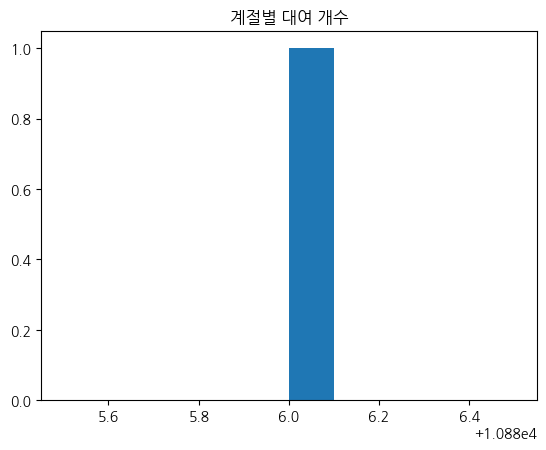

In [15]:
# 계절별 대여 개수
plt.hist(train['season'].count())
plt.title('계절별 대여 개수')

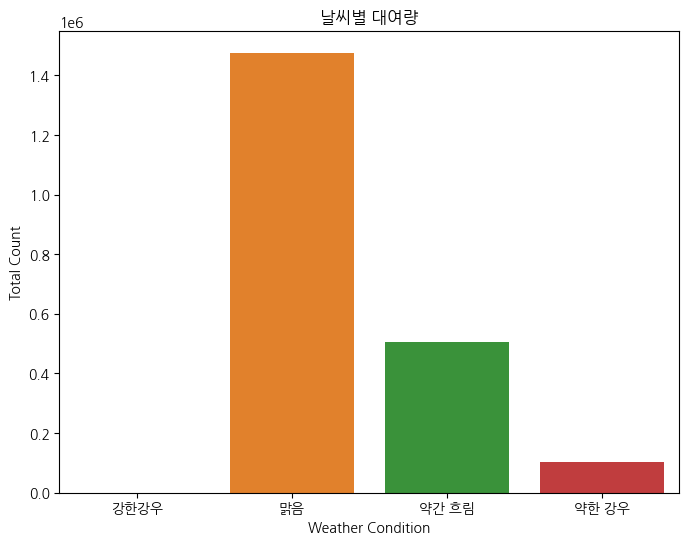

In [16]:
# 날씨별 대여량
fig, ax = plt.subplots(figsize=(8, 6))
weather_counts = train.groupby('weather')['count'].sum()
sns.barplot(x=weather_counts.index, y=weather_counts.values, ax=ax)
ax.set_xlabel('Weather Condition')
ax.set_ylabel('Total Count')
ax.set_title('날씨별 대여량')
plt.show()

## 탐색적 데이터 분석 == Feature Engineering(피처 엔지니어링)

Feature Engineering(피처 엔지니어링) => 머신러닝 알고리즘에 적용할 독립변수를 찾아서 넣어주는 것

==> 미래 예측을 한다고 할 때, 필요한 독립변수는 최소 몇개가 필요할까?

y = x1 + x2 ...

y = ax2 + bx + c

y = ax # 최소 1개만 있으면 가능

- 내가 사용하고자 하는 독립변수 x 컬럼이 정말로 y 변수에 중요한 영향을 끼치는 변수일까?
  + 여러 칼럼들이 중복이 될 수도 있고, 아니면 중요하지 않은 컬럼이 있을 수도 있고
  + 그러한 컬럼을 찾고, 전처리 하는 것(종속변수에 영향을 주냐 안주냐!)

- 각 독립변수의 기울기를 찾는 것이 머신러닝이고, 그 독리변수를 추리는게 탐색적 데이터 분석
- 정형데이터 컬럼이 존재하고, 그걸 추리는 건  => 휴먼
- 비정형데이터 이미지, 영상 그걸 추리는 것 -> 알고리즘 -> 딥러닝

In [17]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

<Axes: xlabel='count', ylabel='Count'>

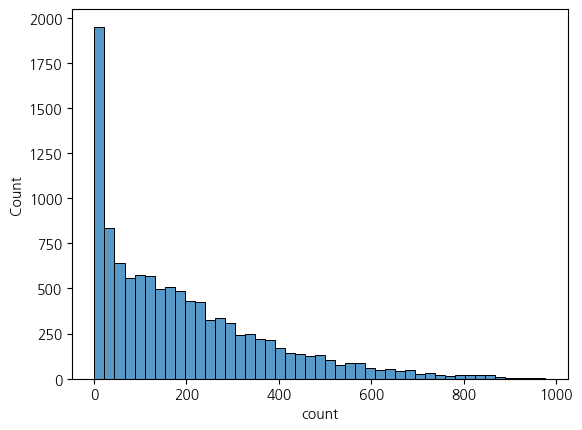

In [22]:
fig, ax = plt.subplots() # 시각화 -> 이 한줄부터 무조건 쓰기! figure 말고
sns.histplot(train['count']) # 히스토그램 그래프

- 전통적으로 정규분포를 따르지만, 이 그래프는 정규분포를 이루고 있지 않음 > 강제로 로그 변환을 통해 정규변환을 이루도록 해준다.
   + np.log

<Axes: xlabel='count', ylabel='Count'>

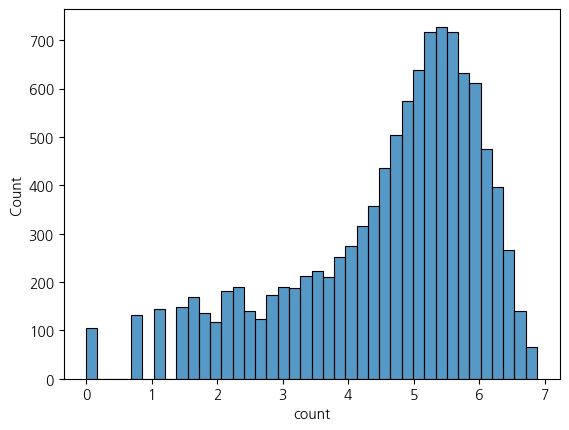

In [26]:
sns.histplot(np.log(train['count'])) # np.log

- 첫번째 작업 완료
  + 종속변수는 로그변환을 취해서 학습을 진행하기로 한다.
  + 로그변환을 하면, 예측을 하면, 로그변환된 값을 예측
  + 로그변환 된 값을 지수 변환으로 변경해서 최종 예측


#### 막대그래프

In [30]:
train.head(1)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,minute,second,weekday
0,2011-01-01 00:00:00,봄,0,0,맑음,9.84,14.395,81,0.0,3,13,16,2011-01-01,2011,01,01,00,00,00,Saturday


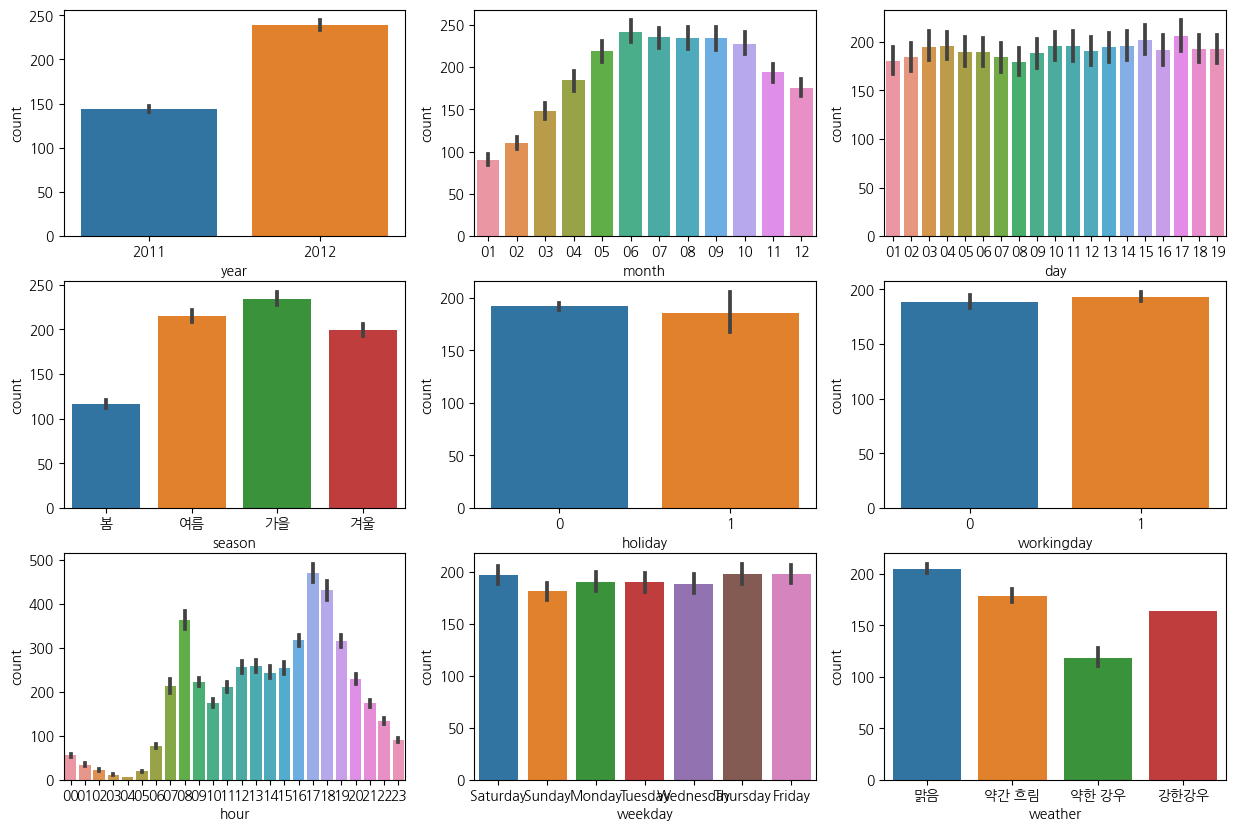

In [38]:
fig, ax = plt.subplots(nrows = 3, ncols = 3, figsize = (15,10))
sns.barplot(x = 'year', y = 'count',data = train, ax = ax[0,0])
sns.barplot(x = 'month', y = 'count',data = train, ax = ax[0,1])
sns.barplot(x = 'day', y = 'count',data = train, ax = ax[0,2])
sns.barplot(x = 'season', y = 'count',data = train, ax = ax[1,0])
sns.barplot(x = 'holiday', y = 'count',data = train, ax = ax[1,1])
sns.barplot(x = 'workingday', y = 'count',data = train, ax = ax[1,2])
sns.barplot(x = 'hour', y = 'count',data = train, ax = ax[2,0])
sns.barplot(x = 'weekday', y = 'count',data = train, ax = ax[2,1])
sns.barplot(x = 'weather', y = 'count',data = train, ax = ax[2,2])
plt.show()

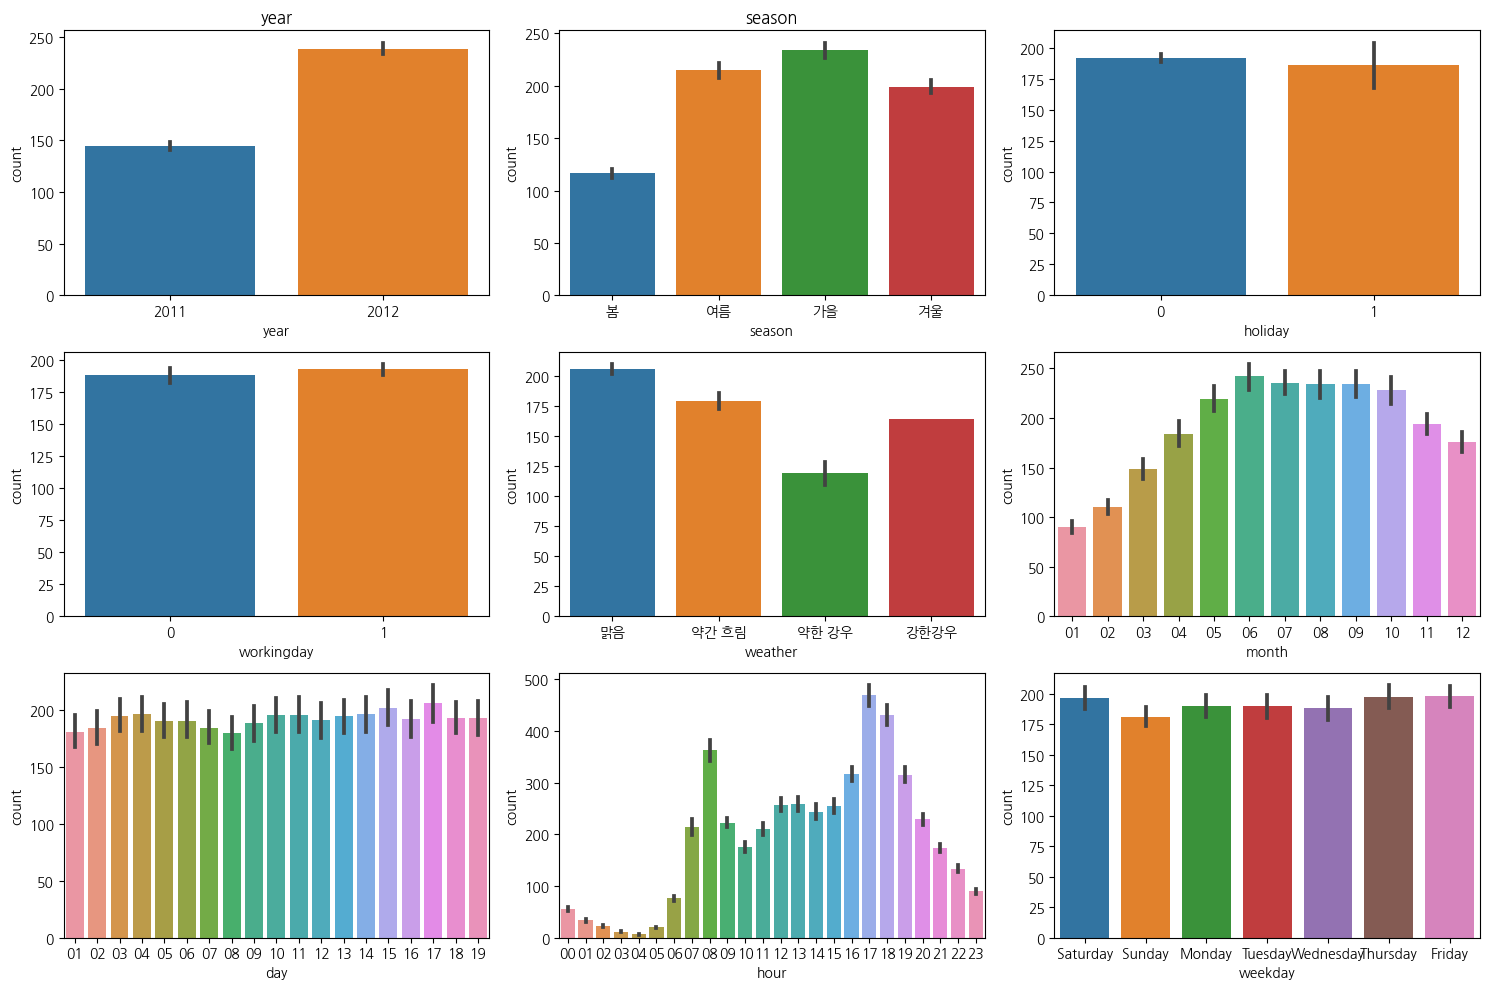

In [39]:
fig, ax = plt.subplots(nrows = 3, ncols = 3, figsize=(15, 10))
sns.barplot(x = 'year', y = 'count', data = train, ax = ax[0, 0])
ax[0, 0].set_title("year")

sns.barplot(x = 'season', y = 'count', data = train, ax = ax[0, 1])
ax[0, 1].set_title("season")

sns.barplot(x = 'holiday', y = 'count', data = train, ax = ax[0, 2])
sns.barplot(x = 'workingday', y = 'count', data = train, ax = ax[1, 0])
sns.barplot(x = 'weather', y = 'count', data = train, ax = ax[1, 1])
sns.barplot(x = 'month', y = 'count', data = train, ax = ax[1, 2])
sns.barplot(x = 'day', y = 'count', data = train, ax = ax[2, 0])
sns.barplot(x = 'hour', y = 'count', data = train, ax = ax[2, 1])
sns.barplot(x = 'weekday', y = 'count', data = train, ax = ax[2, 2])

plt.tight_layout()
plt.show()

In [41]:

test['date'] = test['datetime'].apply(lambda x : x.split()[0]) # 날짜 피처 생성
test['year'] = test['datetime'].apply(lambda x : x.split()[0].split('-')[0])
test['month'] = test['datetime'].apply(lambda x : x.split()[0].split('-')[1])
test['day'] = test['datetime'].apply(lambda x : x.split()[0].split('-')[2])
test['hour'] = test['datetime'].apply(lambda x : x.split()[1].split(':')[0])
test['minute'] = test['datetime'].apply(lambda x : x.split()[1].split(':')[1])
test['second'] = test['datetime'].apply(lambda x : x.split()[1].split(':')[2])
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,date,year,month,day,hour,minute,second
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011-01-20,2011,01,20,00,00,00
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011-01-20,2011,01,20,01,00,00
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011-01-20,2011,01,20,02,00,00
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011-01-20,2011,01,20,03,00,00
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011-01-20,2011,01,20,04,00,00


### day 컬럼은 제거 Task
- day 컬럼은 제외!, 이유 train 119, test 2031
  + 참조할만한 날짜가 훈련데이터에 존재하지 않음

### second, minute 컬럼은 제거 Task
- 아무런 정보가 없음

### boxplot
- season, weather, weekday, holiday
- 2 X 2 배열이 나오도록

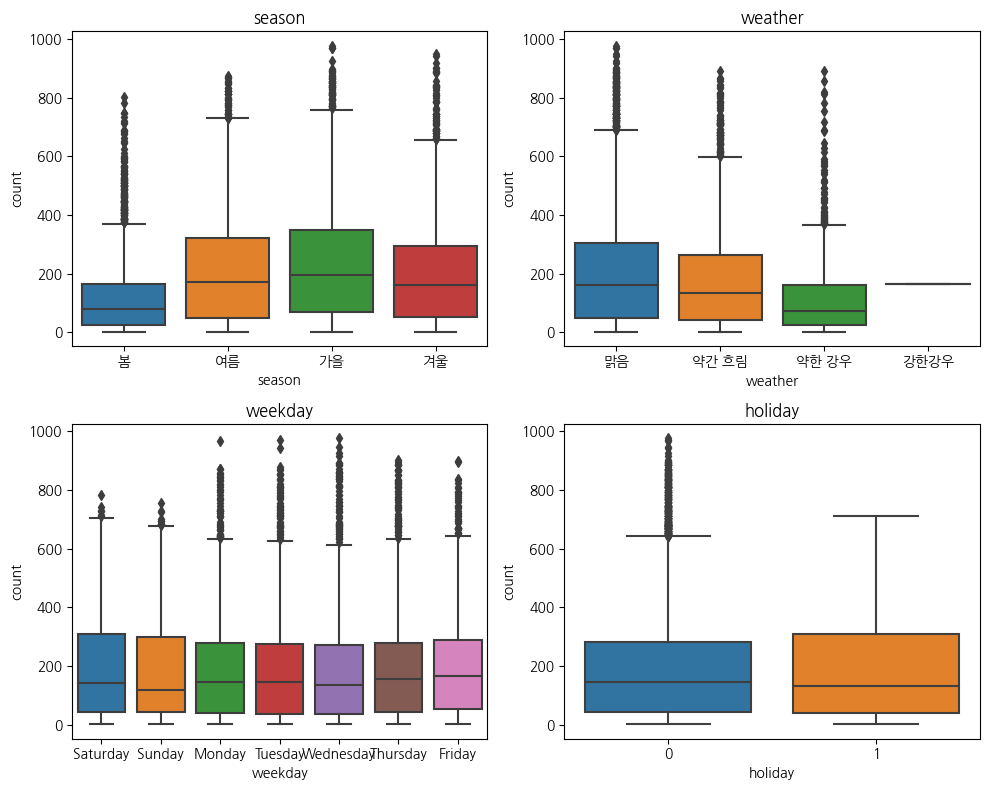

In [49]:
fig, ax = plt.subplots(nrows = 2,ncols = 2,figsize = (10,8))
sns.boxplot(data = train, x = 'season',y = 'count', ax = ax[0,0])
ax[0,0].set_title('season')

sns.boxplot(data = train, x = 'weather',y = 'count', ax = ax[0,1])
ax[0,1].set_title('weather')

sns.boxplot(data = train, x = 'weekday',y = 'count', ax = ax[1,0])
ax[1,0].set_title('weekday')

sns.boxplot(data = train, x = 'holiday',y = 'count', ax = ax[1,1])
ax[1,1].set_title('holiday')
plt.tight_layout()
plt.show()

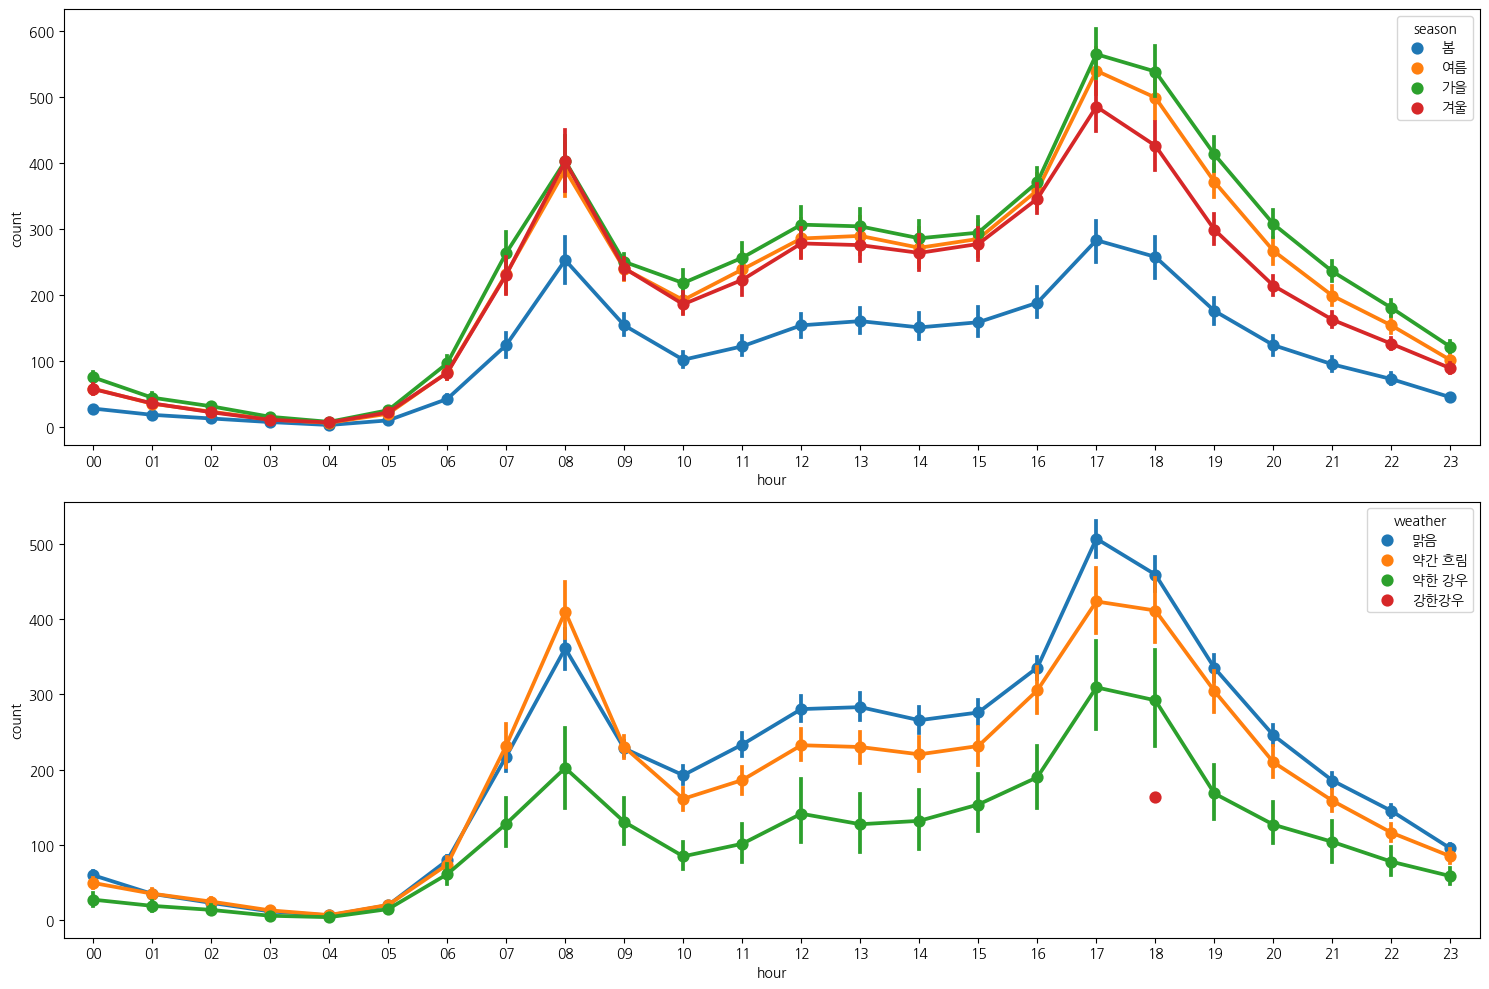

In [55]:
fig, ax = plt.subplots(nrows = 2, figsize = (15,10))

# 계절, 날씨
sns.pointplot( x = 'hour', y = 'count',hue = 'season', data = train, ax = ax[0])
sns.pointplot( x = 'hour', y = 'count',hue = 'weather', data = train, ax = ax[1]) # 이상치 -- 시스템 이상인가?
plt.tight_layout()
plt.show()

In [56]:
train['weather'].value_counts() #강한강우가 하나

맑음       7192
약간 흐림    2834
약한 강우     859
강한강우        1
Name: weather, dtype: int64

- 첫번째 : 시스템 이상? ==> PM에게 보고 ==> 개발자 수정
- 데이터 시각화로 이상치 잡아냄

### 강한강우가 포함된 행은 제거 Task

### 회기식 산점도
- regplot() 사용
- 2 X 2
- 33분까지

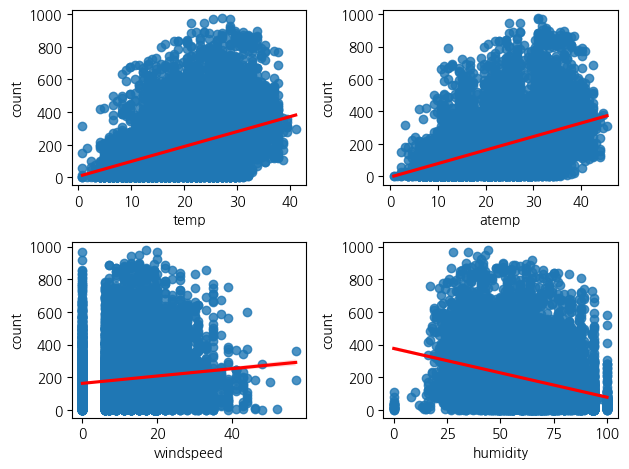

In [66]:
fig, ax = plt.subplots(nrows = 2, ncols = 2)
sns.regplot(x = 'temp', y = 'count', data = train, ax = ax[0,0],line_kws = {'color':'red'})
sns.regplot( x = 'atemp',y = 'count', data = train, ax = ax[0,1],line_kws = {'color':'red'})
sns.regplot( x = 'windspeed',y = 'count', data = train, ax = ax[1,0],line_kws = {'color':'red'})
sns.regplot( x = 'humidity',y = 'count', data = train, ax = ax[1,1],line_kws = {'color':'red'})

plt.tight_layout()
plt.show()

- 다른 컬럼들에 비해 windspeed 는 기울기가 완만함
- humidity 습도에 따라 자전거 대여량이 준다.
- temp, humidity 컬럼만 쓰겠다.

## 최종적인 input 변수 선정
cols = ['','','']
final_df = train.loc[train['weather'] == '강한강우',cols]

In [ ]:
# 탐색적 분석이 끝난 데이터가 됨

cols = ['','','']
final_df = train.loc[train['weather'] == '강한강우',cols]